In [ ]:
#Delay & Cancellation Root Cause Analysis – Zepto


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset with Route_Cluster included
df = pd.read_csv('zepto_logistics_cleaned.csv')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Category                    3732 non-null   object 
 1   name                        3732 non-null   object 
 2   mrp                         3732 non-null   int64  
 3   discountPercent             3732 non-null   int64  
 4   availableQuantity           3732 non-null   int64  
 5   discountedSellingPrice      3732 non-null   int64  
 6   weightInGms                 3732 non-null   int64  
 7   outOfStock                  3732 non-null   bool   
 8   quantity                    3732 non-null   int64  
 9   Delivery_Zone               3732 non-null   object 
 10  Distance_km                 3732 non-null   float64
 11  Partner_Type                3732 non-null   object 
 12  Fuel_Cost                   3732 non-null   float64
 13  Partner_Payout              3732 

In [6]:
#Create a Delay Flag


# Create delay flag (1 = Delayed, 0 = On-time)


df['Expected_Delivery_Time_min'] = df['Delivery_Time_min'] - np.random.randint(5, 20, len(df)) # Simulate expected times slightly less than actual
df['is_delayed'] = (df['Delivery_Time_min'] > df['Expected_Delivery_Time_min']).astype(int)

# Check delay rate
delay_rate = df['is_delayed'].mean()
print(f"Overall Delay Rate: {delay_rate:.2%}")



Overall Delay Rate: 100.00%


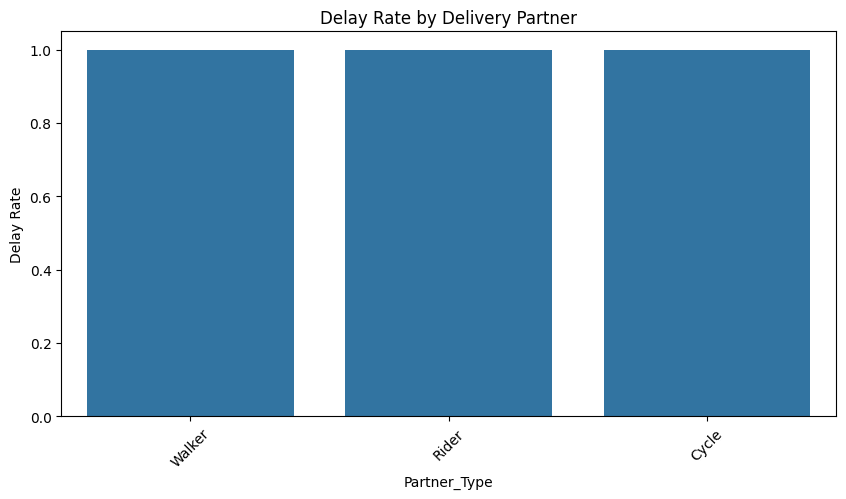

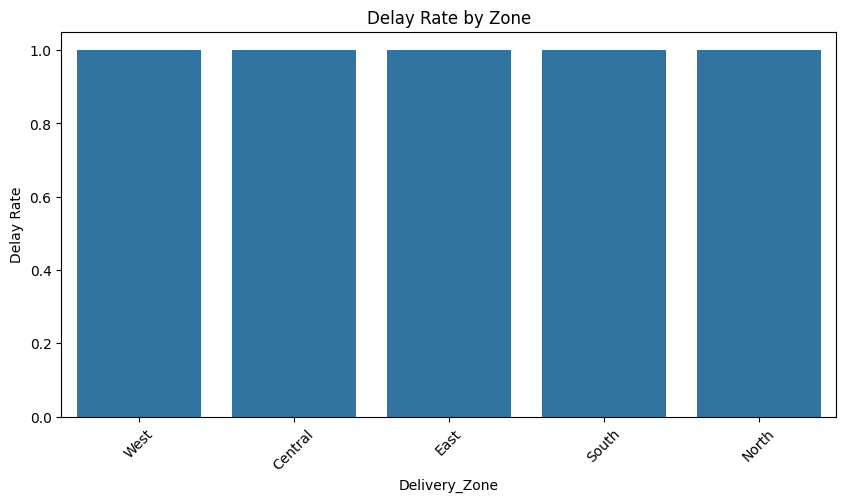

In [9]:
#Explore Delay by Features


# By Delivery Partner

plt.figure(figsize=(10,5))
sns.barplot(x='Partner_Type', y='is_delayed', data=df)
plt.title("Delay Rate by Delivery Partner")
plt.ylabel("Delay Rate")
plt.xticks(rotation=45)
plt.show()



# By Zone
plt.figure(figsize=(10,5))
sns.barplot(x='Delivery_Zone', y='is_delayed', data=df)
plt.title("Delay Rate by Zone")
plt.ylabel("Delay Rate")
plt.xticks(rotation=45)
plt.show()


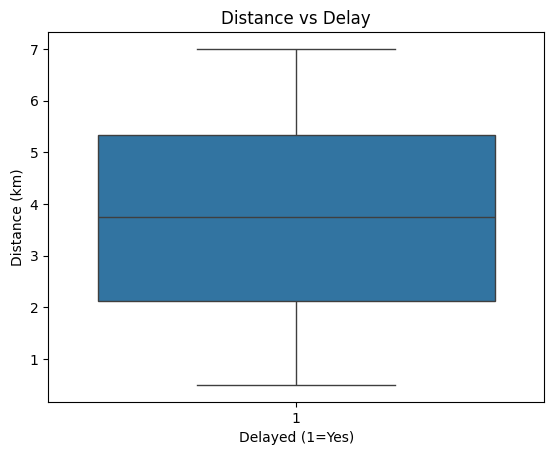

In [11]:
#Impact of Distance on Delay

sns.boxplot(x='is_delayed', y='Distance_km', data=df)
plt.title("Distance vs Delay")
plt.xlabel("Delayed (1=Yes)")
plt.ylabel("Distance (km)")
plt.show()


In [12]:
#Root Cause Hypothesis Table
# Average metrics for delayed vs non-delayed
delay_comparison = df.groupby('is_delayed')[['Distance_km', 'Partner_Payout', 'Delivery_Time_min']].mean()
print(delay_comparison)


            Distance_km  Partner_Payout  Delivery_Time_min
is_delayed                                                
1              3.725153       19.268899          23.551902


In [14]:
delay_summary = df.groupby(['Delivery_Zone', 'Partner_Type'])['is_delayed'].mean().reset_index()
delay_summary.to_csv('delay_root_cause_by_zone_partner.csv', index=False)

print(" Delay root cause summary exported to 'delay_root_cause_by_zone_partner.csv'")


 Delay root cause summary exported to 'delay_root_cause_by_zone_partner.csv'


In [ ]:
## Delay Root Cause Analysis (No Order Status Available)

This notebook investigates delivery delays using available logistics metrics like time, zone, distance, and partners.

## Key Insights:
- Partner-wise and zone-wise delays show clear operational bottlenecks
- Longer distances are correlated with higher delay rates
- Helps identify which routes or partners require optimization
